# TE expression 5 tissue consistent

In [2]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# Universal CHM, totally inside A/B compartments

## target TEs

In [3]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/CHM_intersect_table
mkdir -p targetTEs
for compart in A B;do
    for distance in 0 50 10000 50000;do
        mkdir -p targetTEs/within_${distance}b
        windowBed -w ${distance} -a intersectOnly_UniversalCHM_5tissue_${compart}.bed -b /mnt/Storage/home/yanghui/imprinting/result.2021/Exploring/CHMsInOtherContexts/CellStateTransition/Prepare/TEUnitAssemble/mm10_te_tx_TSS.bed | cut -f 12 | sort -u > targetTEs/within_${distance}b/UniversalCHM_${compart}.targetTEs_RefSeq.txt # 
    done
done

In [8]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/nonCHM_intersect_table
for compart in A B;do
    for distance in 0 50 10000 50000;do
        mkdir -p targetTEs/within_${distance}b
        windowBed -w ${distance} -a intersectOnly_nonCHM_5tissue_${compart}.bed -b /mnt/Storage/home/yanghui/imprinting/result.2021/Exploring/CHMsInOtherContexts/CellStateTransition/Prepare/TEUnitAssemble/mm10_te_tx_TSS.bed | cut -f 7 | sort -u > targetTEs/within_${distance}b/nonCHM_${compart}.targetTEs_RefSeq.txt # 
    done
done

In [3]:
### read in target TEs as dict
target_TE_dict = {}
for t in ['UniversalCHM', 'nonCHM'] :
    target_TE_dict[t] = {}
    t_short = 'CHM' if t == 'UniversalCHM' else t
    for distance in [0, 50, 10000, 50000] :
        target_TE_dict[t][distance] = {}
        os.chdir(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/{t_short}_intersect_table/targetTEs/within_{distance}b')
        for compart in ['A', 'B'] :
            target_TE_dict[t][distance][compart] = pd.read_csv(f'{t}_{compart}.targetTEs_RefSeq.txt', header = None)[0].tolist()

## expression level

### read in TPM matrix

In [4]:
### read in TPM matrix
expr_mat = pd.read_csv('/mnt/Storage/home/yanghui/imprinting/result.2021/Exploring/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Functions/Regulatory/TransposableElement/mm10_te_transcript.log2TPM_plus1.txt', sep = "\t")
expr_mat.head()

,TE_transcript,2cell.rep1,2cell.rep2,2cell.rep3,2cell.rep4,8cell.rep1,8cell.rep2,8cell.rep3,Morula.rep1,Morula.rep2,...,E13.5_liver.rep1,E13.5_liver.rep2,E14.5_liver.rep1,E14.5_liver.rep2,E15.5_liver.rep1,E15.5_liver.rep2,E16.5_liver.rep1,E16.5_liver.rep2,P0_liver.rep1,P0_liver.rep2
0,TU1,0.322292,1.836873,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,TU10,0.235138,0.008321,0.000000,1.075800,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,TU100,0.542693,0.000000,0.000000,0.175892,0.0,0.000000,0.000000,1.016921,0.000000,...,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,TU1000,1.947393,0.000000,0.000000,0.531876,0.0,0.547198,0.010678,1.118545,0.003518,...,0.037091,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.097483,0.002648
4,TU10000,0.000000,0.000000,0.719179,0.448241,0.0,0.000000,0.000000,0.054214,0.000000,...,0.048316,0.0,0.0,0.0245,0.060583,0.0,0.024648,0.023156,0.043306,0.021776


In [5]:
expr_mat.columns = ['TE_transcript', 
                    'EarlyEmbryo_2-cell_rep1', 'EarlyEmbryo_2-cell_rep2', 'EarlyEmbryo_2-cell_rep3', 'EarlyEmbryo_2-cell_rep4',
                    'EarlyEmbryo_8-cell_rep1', 'EarlyEmbryo_8-cell_rep2', 'EarlyEmbryo_8-cell_rep3',
                    'EarlyEmbryo_Morula_rep1', 'EarlyEmbryo_Morula_rep2', 
                    'EarlyEmbryo_ICM_rep1','EarlyEmbryo_ICM_rep2', 'EarlyEmbryo_ICM_rep3', 'EarlyEmbryo_ICM_rep4', 
                    'PGC_E10.5_rep1',
                    'PGC_E13.5_female_rep1', 'PGC_E13.5_female_rep2', 'PGC_E13.5_female_rep3', 
                    'PGC_E13.5_male_rep1', 'PGC_E13.5_male_rep2', 'PGC_E13.5_male_rep3', 'PGC_E13.5_male_rep4', 
                    'Sperm_GS_rep1', 'Sperm_GS_rep2', 
                    'Sperm_PS_rep1', 'Sperm_PS_rep2', 
                    'Sperm_RS_rep1', 'Sperm_RS_rep2', 
                    'Retinal_E14.5_rep1', 'Retinal_E14.5_rep2', 
                    'Retinal_E17.5_rep1', 'Retinal_E17.5_rep2', 
                    'Retinal_P0_rep1', 'Retinal_P0_rep2', 
                    'Retinal_P3_rep1', 'Retinal_P3_rep2',
                    'Retinal_P7_rep1', 'Retinal_P7_rep2', 
                    'Retinal_P10_rep1', 'Retinal_P10_rep2', 
                    'Retinal_P14_rep1', 'Retinal_P14_rep2',
                    'Retinal_P21_rep1', 
                    'Heart_E10.5_rep1', 'Heart_E10.5_rep2', 
                    'Heart_E11.5_rep1', 'Heart_E11.5_rep2',
                    'Heart_E12.5_rep1', 'Heart_E12.5_rep2', 
                    'Heart_E13.5_rep1', 'Heart_E13.5_rep2', 
                    'Heart_E14.5_rep1', 'Heart_E14.5_rep2',
                    'Heart_E15.5_rep1', 'Heart_E15.5_rep2', 
                    'Heart_E16.5_rep1', 'Heart_E16.5_rep2', 
                    'Heart_P0_rep1', 'Heart_P0_rep2',
                    'Liver_E11.5_rep1', 'Liver_E11.5_rep2', 
                    'Liver_E12.5_rep1', 'Liver_E12.5_rep2', 
                    'Liver_E13.5_rep1', 'Liver_E13.5_rep2',
                    'Liver_E14.5_rep1', 'Liver_E14.5_rep2', 
                    'Liver_E15.5_rep1', 'Liver_E15.5_rep2', 
                    'Liver_E16.5_rep1', 'Liver_E16.5_rep2',
                    'Liver_P0_rep1', 'Liver_P0_rep2']
expr_mat.head()

,TE_transcript,EarlyEmbryo_2-cell_rep1,EarlyEmbryo_2-cell_rep2,EarlyEmbryo_2-cell_rep3,EarlyEmbryo_2-cell_rep4,EarlyEmbryo_8-cell_rep1,EarlyEmbryo_8-cell_rep2,EarlyEmbryo_8-cell_rep3,EarlyEmbryo_Morula_rep1,EarlyEmbryo_Morula_rep2,...,Liver_E13.5_rep1,Liver_E13.5_rep2,Liver_E14.5_rep1,Liver_E14.5_rep2,Liver_E15.5_rep1,Liver_E15.5_rep2,Liver_E16.5_rep1,Liver_E16.5_rep2,Liver_P0_rep1,Liver_P0_rep2
0,TU1,0.322292,1.836873,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,TU10,0.235138,0.008321,0.000000,1.075800,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,TU100,0.542693,0.000000,0.000000,0.175892,0.0,0.000000,0.000000,1.016921,0.000000,...,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,TU1000,1.947393,0.000000,0.000000,0.531876,0.0,0.547198,0.010678,1.118545,0.003518,...,0.037091,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.097483,0.002648
4,TU10000,0.000000,0.000000,0.719179,0.448241,0.0,0.000000,0.000000,0.054214,0.000000,...,0.048316,0.0,0.0,0.0245,0.060583,0.0,0.024648,0.023156,0.043306,0.021776


In [6]:
expr_mean_mat = expr_mat.dropna().T
expr_mean_mat.columns = expr_mean_mat.iloc[0,:]
expr_mean_mat = expr_mean_mat.drop(['TE_transcript']).reset_index()
expr_mean_mat['sample'] = expr_mean_mat['index'].str.split('_r', expand = True)[0]
expr_mean_mat.head()

TE_transcript,index,TU1,TU10,TU100,TU1000,TU10000,TU100002,TU100004,TU100005,TU100006,...,TU99983,TU99984,TU99985,TU99988,TU99989,TU9999,TU99990,TU99991,TU99992,sample
0,EarlyEmbryo_2-cell_rep1,0.322292,0.235138,0.542693,1.947393,0.0,0.584634,0.051734,0.947981,0.017896,...,0.1077,0.934967,0.108077,0.00043,0.103686,0.103766,2.758523,0.0,0.0,EarlyEmbryo_2-cell
1,EarlyEmbryo_2-cell_rep2,1.836873,0.008321,0.0,0.0,0.0,0.0,0.0,0.0,0.061582,...,0.054136,0.460731,0.054329,0.000382,0.052083,0.102393,2.662714,0.0,0.0,EarlyEmbryo_2-cell
2,EarlyEmbryo_2-cell_rep3,0.0,0.0,0.0,0.0,0.719179,1.305708,0.0,0.725561,0.068596,...,0.070354,0.961986,0.070603,0.000305,0.067699,0.78344,2.439128,0.0,0.0,EarlyEmbryo_2-cell
3,EarlyEmbryo_2-cell_rep4,0.0,1.0758,0.175892,0.531876,0.448241,0.255916,0.0,0.094313,0.689448,...,0.08677,0.381372,0.087075,0.00031,0.083514,0.162578,2.4712,0.0,0.0,EarlyEmbryo_2-cell
4,EarlyEmbryo_8-cell_rep1,0.0,0.0,0.0,0.0,0.0,0.75589,0.196349,0.0,1.343927,...,0.0,0.0,0.0,0.0,0.0,0.6741,0.476954,0.157757,0.0,EarlyEmbryo_8-cell


In [7]:
expr_mean_mat['sample'].unique()

array(['EarlyEmbryo_2-cell', 'EarlyEmbryo_8-cell', 'EarlyEmbryo_Morula',
       'EarlyEmbryo_ICM', 'PGC_E10.5', 'PGC_E13.5_female',
       'PGC_E13.5_male', 'Sperm_GS', 'Sperm_PS', 'Sperm_RS',
       'Retinal_E14.5', 'Retinal_E17.5', 'Retinal_P0', 'Retinal_P3',
       'Retinal_P7', 'Retinal_P10', 'Retinal_P14', 'Retinal_P21',
       'Heart_E10.5', 'Heart_E11.5', 'Heart_E12.5', 'Heart_E13.5',
       'Heart_E14.5', 'Heart_E15.5', 'Heart_E16.5', 'Heart_P0',
       'Liver_E11.5', 'Liver_E12.5', 'Liver_E13.5', 'Liver_E14.5',
       'Liver_E15.5', 'Liver_E16.5', 'Liver_P0'], dtype=object)

### mean TPM by sample

In [8]:
expr_meanBySample_mat = expr_mean_mat.groupby(['sample']).mean()
expr_meanBySample_mat

/mnt/Storage/home/wangyiman/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


TE_transcript,TU1,TU10,TU100,TU1000,TU10000,TU100002,TU100004,TU100005,TU100006,TU100007,...,TU99982,TU99983,TU99984,TU99985,TU99988,TU99989,TU9999,TU99990,TU99991,TU99992
sample,,,,,,,,,,,,,,,,,,,,,
EarlyEmbryo_2-cell,0.539791,0.329815,0.179646,0.619817,0.291855,0.536565,0.012933,0.441964,0.209381,1.151104,...,3.116834,0.07974,0.684764,0.080021,0.000357,0.076745,0.288044,2.582891,0.000000,0.000000
EarlyEmbryo_8-cell,0.000000,0.000000,0.000000,0.185959,0.000000,1.026281,0.249133,0.000000,1.843571,1.416528,...,1.392525,0.00000,0.060958,0.000000,0.000019,0.000000,0.291919,0.484655,0.052586,0.000000
EarlyEmbryo_ICM,0.000000,0.000000,2.275265,0.202622,0.699985,0.000000,0.728197,0.000000,2.692992,4.457110,...,0.000040,0.00000,0.000000,0.000000,0.000000,0.000000,1.429048,0.007166,0.000000,0.117808
EarlyEmbryo_Morula,0.000000,0.000000,0.508461,0.561031,0.027107,0.002317,0.167521,0.000000,1.294914,3.114159,...,0.538636,0.00000,0.460796,0.000000,0.000018,0.000000,0.230283,0.197099,0.000000,0.000000
Heart_E10.5,0.000000,0.000000,0.000000,0.000000,0.074672,0.000000,0.285467,0.000000,1.203484,4.312482,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.194407,0.000000,0.088304,0.000000
Heart_E11.5,0.000000,0.013404,0.000000,0.026511,0.000000,0.000000,0.386135,0.000000,0.523290,4.128613,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.434554,0.000000,0.030467,0.000000
Heart_E12.5,0.000000,0.000000,0.000000,0.000000,0.105991,0.000000,0.289774,0.000000,0.201192,4.165152,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.207531,0.000000,0.033785,0.000000
Heart_E13.5,0.000000,0.000000,0.041597,0.000000,0.064060,0.000000,0.349965,0.000000,0.368118,4.534180,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.234546,0.000000,0.016098,0.000000
Heart_E14.5,0.000000,0.000000,0.000000,0.022188,0.125503,0.000000,0.499143,0.000000,0.106067,4.669889,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.326542,0.000000,0.018531,0.000000


In [9]:
expr_meanBySample_mat_T = expr_meanBySample_mat.T
expr_meanBySample_mat_T

sample,EarlyEmbryo_2-cell,EarlyEmbryo_8-cell,EarlyEmbryo_ICM,EarlyEmbryo_Morula,Heart_E10.5,Heart_E11.5,Heart_E12.5,Heart_E13.5,Heart_E14.5,Heart_E15.5,...,Retinal_E17.5,Retinal_P0,Retinal_P10,Retinal_P14,Retinal_P21,Retinal_P3,Retinal_P7,Sperm_GS,Sperm_PS,Sperm_RS
TE_transcript,,,,,,,,,,,,,,,,,,,,,
TU1,0.539791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054132,0.201884
TU10,0.329815,0.000000,0.000000,0.000000,0.000000,0.013404,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TU100,0.179646,0.000000,2.275265,0.508461,0.000000,0.000000,0.000000,0.041597,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.023011,0.000000,0.000000,0.000000,0.311867,0.000000
TU1000,0.619817,0.185959,0.202622,0.561031,0.000000,0.026511,0.000000,0.000000,0.022188,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001503,0.000000,0.000000
TU10000,0.291855,0.000000,0.699985,0.027107,0.074672,0.000000,0.105991,0.064060,0.125503,0.174137,...,0.109408,0.137044,0.232259,0.152942,0.223018,0.093091,0.117409,0.026349,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TU99989,0.076745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TU9999,0.288044,0.291919,1.429048,0.230283,0.194407,0.434554,0.207531,0.234546,0.326542,0.228075,...,0.016596,0.013813,0.000000,0.005955,0.000000,0.000000,0.003313,0.000000,0.000000,0.000000
TU99990,2.582891,0.484655,0.007166,0.197099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.017482,0.009179,0.016326,0.024752,0.081868


In [10]:
#     for cell_type in ['ES', 'NPC', 'CN', 'intersect'] :
plot_df = pd.DataFrame()
for t in ['UniversalCHM', 'nonCHM'] :
    for distance in [0, 50, 10000, 50000] :
        for compart in ['A', 'B'] :
            ls = target_TE_dict[t][distance][compart]
            df = expr_meanBySample_mat_T.loc[expr_meanBySample_mat_T.index.isin(ls)].reset_index().melt(id_vars='TE_transcript')
            df['compart'] = compart
            df['distance'] = distance
            df['Type'] = t
            df['group'] = df['Type'] + '-' + df['compart'] + '-' + df['distance'].astype('str') + 'b'
            plot_df = pd.concat([plot_df, df])

plot_df                    

,TE_transcript,sample,value,compart,distance,Type,group
0,TU100877,EarlyEmbryo_2-cell,0.000000,A,0,UniversalCHM,UniversalCHM-A-0b
1,TU101530,EarlyEmbryo_2-cell,0.000000,A,0,UniversalCHM,UniversalCHM-A-0b
2,TU10592,EarlyEmbryo_2-cell,0.297615,A,0,UniversalCHM,UniversalCHM-A-0b
3,TU10593,EarlyEmbryo_2-cell,0.225885,A,0,UniversalCHM,UniversalCHM-A-0b
4,TU10594,EarlyEmbryo_2-cell,0.958073,A,0,UniversalCHM,UniversalCHM-A-0b
...,...,...,...,...,...,...,...
42895,TU99475,Sperm_RS,0.000000,B,50000,nonCHM,nonCHM-B-50000b
42896,TU99499,Sperm_RS,0.000000,B,50000,nonCHM,nonCHM-B-50000b
42897,TU99500,Sperm_RS,0.019909,B,50000,nonCHM,nonCHM-B-50000b
42898,TU99503,Sperm_RS,0.000000,B,50000,nonCHM,nonCHM-B-50000b


In [11]:
sample_order = [
    [i, sample] for i, sample in enumerate(expr_mean_mat['sample'].unique())
]
sample_order_df = pd.DataFrame(sample_order)
sample_order_df.columns = ['Order', 'sample']
sample_order_df.head(7)

,Order,sample
0,0,EarlyEmbryo_2-cell
1,1,EarlyEmbryo_8-cell
2,2,EarlyEmbryo_Morula
3,3,EarlyEmbryo_ICM
4,4,PGC_E10.5
5,5,PGC_E13.5_female
6,6,PGC_E13.5_male


In [12]:
plot_df_order = pd.merge(plot_df, sample_order_df, on = 'sample')
plot_df_order.head()

,TE_transcript,sample,value,compart,distance,Type,group,Order
0,TU100877,EarlyEmbryo_2-cell,0.000000,A,0,UniversalCHM,UniversalCHM-A-0b,0
1,TU101530,EarlyEmbryo_2-cell,0.000000,A,0,UniversalCHM,UniversalCHM-A-0b,0
2,TU10592,EarlyEmbryo_2-cell,0.297615,A,0,UniversalCHM,UniversalCHM-A-0b,0
3,TU10593,EarlyEmbryo_2-cell,0.225885,A,0,UniversalCHM,UniversalCHM-A-0b,0
4,TU10594,EarlyEmbryo_2-cell,0.958073,A,0,UniversalCHM,UniversalCHM-A-0b,0


In [13]:
plot_df_order_log2plus1 = plot_df_order.copy()
# plot_df_order_log2plus1['log2(TPM+1)'] = np.log2(plot_df_order_log2plus1['value'] + 1)
plot_df_order_log2plus1['log2(TPM+1)'] = plot_df_order_log2plus1['value']
plot_df_order_log2plus1

,TE_transcript,sample,value,compart,distance,Type,group,Order,log2(TPM+1)
0,TU100877,EarlyEmbryo_2-cell,0.000000,A,0,UniversalCHM,UniversalCHM-A-0b,0,0.000000
1,TU101530,EarlyEmbryo_2-cell,0.000000,A,0,UniversalCHM,UniversalCHM-A-0b,0,0.000000
2,TU10592,EarlyEmbryo_2-cell,0.297615,A,0,UniversalCHM,UniversalCHM-A-0b,0,0.297615
3,TU10593,EarlyEmbryo_2-cell,0.225885,A,0,UniversalCHM,UniversalCHM-A-0b,0,0.225885
4,TU10594,EarlyEmbryo_2-cell,0.958073,A,0,UniversalCHM,UniversalCHM-A-0b,0,0.958073
...,...,...,...,...,...,...,...,...,...
1742560,TU99475,Sperm_RS,0.000000,B,50000,nonCHM,nonCHM-B-50000b,9,0.000000
1742561,TU99499,Sperm_RS,0.000000,B,50000,nonCHM,nonCHM-B-50000b,9,0.000000
1742562,TU99500,Sperm_RS,0.019909,B,50000,nonCHM,nonCHM-B-50000b,9,0.019909
1742563,TU99503,Sperm_RS,0.000000,B,50000,nonCHM,nonCHM-B-50000b,9,0.000000


In [14]:
print(1)

1


### CHM_A v.s. CHM_B v.s. nonCHM_A v.s. nonCHM_B (used)

<ipython-input-20-9aa5cba3f759>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type_compart'] = df['Type'] + ' in ' + df['compart']


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

32_UniversalCHM in B v.s. 32_nonCHM in B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.558e-01 U_stat=1.019e+04
17_UniversalCHM in A v.s. 17_nonCHM in A: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.004e+05
18_UniversalCHM in A v.s. 18_nonCHM in A: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.910e-07 U_stat=8.149e+04
19_UniversalCHM in A v.s. 19_nonCHM in A: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.957e-06 U_stat=8.231e+04
20_UniversalCHM in A v.s. 20_nonCHM in A: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.136e-07 U_stat=8.175e+04
21_UniversalCHM in A v.s. 21_nonCHM in A: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.395e-07 U_stat=8.059e

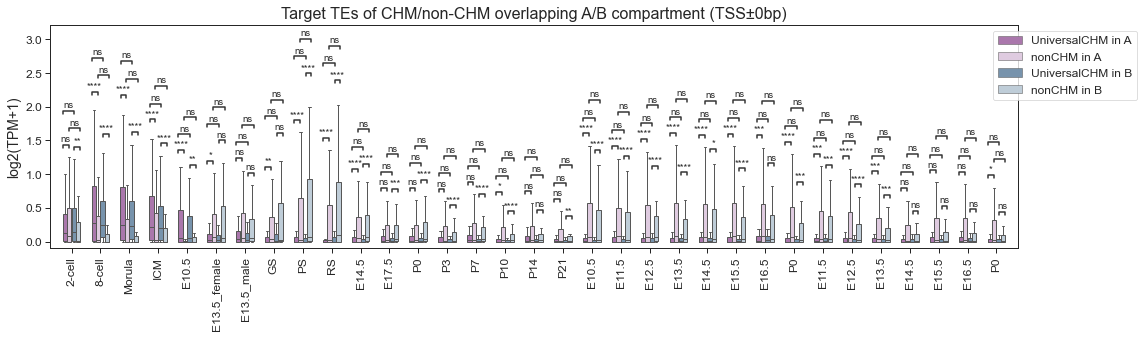

In [20]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 16,
                             'axes.labelsize': 14,
                             'xtick.labelsize': 12,
                             'ytick.labelsize': 12,
                             'legend.fontsize': 12
                         }):
#     for distance in [0, 50, 10000, 50000] :
    for distance in [0] :
        df = plot_df_order_log2plus1.loc[(plot_df_order_log2plus1['distance'] == distance)]
        df['Type_compart'] = df['Type'] + ' in ' + df['compart']
        fig, ax = plt.subplots(figsize=(6.4 * 2.5, 4.8), tight_layout = True)
        sns.boxplot(
            data = df,
            y = 'log2(TPM+1)',
            x = 'Order',
            hue = 'Type_compart',
            hue_order = ['UniversalCHM in A', 'nonCHM in A', 'UniversalCHM in B', 'nonCHM in B'],
            showfliers = False, 
            palette = ['#B26EB5', '#E2C8E3', '#6E94B5', '#BBCDDC'],
            width = .618,
            linewidth = 1
        )
        add_stat_annotation(ax, data=df, x='Order', y='log2(TPM+1)', hue = 'Type_compart', hue_order = ['UniversalCHM in A', 'nonCHM in A', 'UniversalCHM in B', 'nonCHM in B'],
                box_pairs=[((int(x.get_text()), 'UniversalCHM in A'), (int(x.get_text()), 'nonCHM in A')) for x in ax.get_xticklabels()] + 
                          [((int(x.get_text()), 'UniversalCHM in A'), (int(x.get_text()), 'UniversalCHM in B')) for x in ax.get_xticklabels()] + 
                          [((int(x.get_text()), 'nonCHM in A'), (int(x.get_text()), 'nonCHM in B')) for x in ax.get_xticklabels()] + 
                          [((int(x.get_text()), 'UniversalCHM in B'), (int(x.get_text()), 'nonCHM in B')) for x in ax.get_xticklabels()],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)        
        ax.set_title(f'Target TEs of CHM/non-CHM overlapping A/B compartment (TSS±{distance}bp)')
        ax.set_xlabel('')
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(['_'.join(x.split('_')[1:]) for x in sample_order_df['sample']], rotation = 90, ha = 'center', va = 'top')
        h,l = ax.get_legend_handles_labels()
        ax.legend(h, l, title = '', loc = 'upper right', bbox_to_anchor = (1.13, 1))

        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make13_box_TETPM_{distance}_compareCHMnonCHMAB_5tissue_consistent_pvalue.pdf', transparent = True)
        

<ipython-input-19-f86353be7ada>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type_compart'] = df['Type'] + ' in ' + df['compart']


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

32_nonCHM in A v.s. 32_nonCHM in B: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.560e+00
17_UniversalCHM in A v.s. 17_UniversalCHM in B: t-test independent samples with Bonferroni correction, P_val=2.109e-01 stat=3.176e+00
18_UniversalCHM in A v.s. 18_UniversalCHM in B: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=2.437e+00
19_UniversalCHM in A v.s. 19_UniversalCHM in B: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=2.635e+00
20_UniversalCHM in A v.s. 20_UniversalCHM in B: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=2.531e+00
21_UniversalCHM in A v.s. 21_UniversalCHM in B: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=2.478e+00
22_UniversalCHM in A v.s. 22_UniversalCHM in

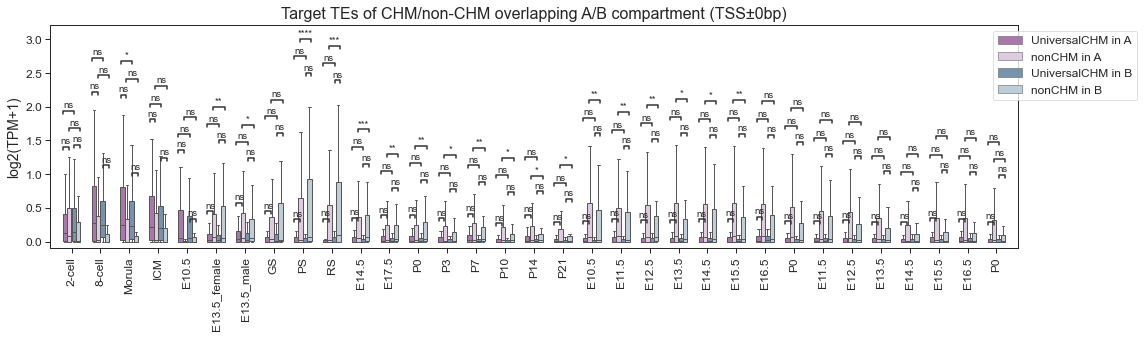

In [19]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 16,
                             'axes.labelsize': 14,
                             'xtick.labelsize': 12,
                             'ytick.labelsize': 12,
                             'legend.fontsize': 12
                         }):
#     for distance in [0, 50, 10000, 50000] :
    for distance in [0] :
        df = plot_df_order_log2plus1.loc[(plot_df_order_log2plus1['distance'] == distance)]
        df['Type_compart'] = df['Type'] + ' in ' + df['compart']
        fig, ax = plt.subplots(figsize=(6.4 * 2.5, 4.8), tight_layout = True)
        sns.boxplot(
            data = df,
            y = 'log2(TPM+1)',
            x = 'Order',
            hue = 'Type_compart',
            hue_order = ['UniversalCHM in A', 'nonCHM in A', 'UniversalCHM in B', 'nonCHM in B'],
            showfliers = False, 
            palette = ['#B26EB5', '#E2C8E3', '#6E94B5', '#BBCDDC'],
            width = .618,
            linewidth = 1
        )
        add_stat_annotation(ax, data=df, x='Order', y='log2(TPM+1)', hue = 'Type_compart', hue_order = ['UniversalCHM in A', 'nonCHM in A', 'UniversalCHM in B', 'nonCHM in B'],
                box_pairs=[((int(x.get_text()), 'UniversalCHM in A'), (int(x.get_text()), 'nonCHM in A')) for x in ax.get_xticklabels()] + 
                          [((int(x.get_text()), 'UniversalCHM in A'), (int(x.get_text()), 'UniversalCHM in B')) for x in ax.get_xticklabels()] + 
                          [((int(x.get_text()), 'nonCHM in A'), (int(x.get_text()), 'nonCHM in B')) for x in ax.get_xticklabels()] + 
                          [((int(x.get_text()), 'UniversalCHM in B'), (int(x.get_text()), 'nonCHM in B')) for x in ax.get_xticklabels()],
                test='t-test_ind', text_format='star', loc='inside', verbose=2)        
        ax.set_title(f'Target TEs of CHM/non-CHM overlapping A/B compartment (TSS±{distance}bp)')
        ax.set_xlabel('')
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(['_'.join(x.split('_')[1:]) for x in sample_order_df['sample']], rotation = 90, ha = 'center', va = 'top')
        h,l = ax.get_legend_handles_labels()
        ax.legend(h, l, title = '', loc = 'upper right', bbox_to_anchor = (1.13, 1))

        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make13_box_TETPM_{distance}_compareCHMnonCHMAB_5tissue_consistent_pvalue.pdf', transparent = True)
        